In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
data = pd.read_csv("processed_data.csv").drop(columns=["Unnamed: 0"]).dropna()

In [3]:
# Data defore cleaning
data.loc[4468]

Appid                                                         105600
Game name                                                   Terraria
Release date                                            May 16, 2011
Coming soon                                                    False
Initial price                                                   9.99
Final price                                                     9.99
Developer                                                   Re-Logic
Category           Single-player, Multi-player, PvP, Online PvP, ...
Genre                                  Action, Adventure, Indie, RPG
Recommendations                                               457853
Name: 4468, dtype: object

In [4]:
## Split Genre into columns
Genre_Columns = []
for i in range(1,12):
    Genre_Columns.append("Genre"+str(i))
    
data[Genre_Columns] = data['Genre'].str.split(", ", 10, expand=True)

In [5]:
## Split Category into columns (7)
Category_Columns = ["Single-player", "Multi-player", "Co-op", "MMO", "VR Support", "PvP", "Remote Play on Phone"]

for i in Category_Columns:
    data[i] = data["Category"].str.contains(str(i), na=True)

In [6]:
## Split Developers into columns (3)
data[["Developer Major","Developer 2", "Developer 3"]] = data['Developer'].str.split(", ", 2, expand=True)

In [7]:
# Data after cleaning
data.loc[4468]

Appid                                                              105600
Game name                                                        Terraria
Release date                                                 May 16, 2011
Coming soon                                                         False
Initial price                                                        9.99
Final price                                                          9.99
Developer                                                        Re-Logic
Category                Single-player, Multi-player, PvP, Online PvP, ...
Genre                                       Action, Adventure, Indie, RPG
Recommendations                                                    457853
Genre1                                                             Action
Genre2                                                          Adventure
Genre3                                                              Indie
Genre4                                

In [8]:
## Data Description
data[["Initial price","Final price", "Recommendations"]].describe()

,Initial price,Final price,Recommendations
count,10181.000000,10181.000000,1.018100e+04
mean,9.787357,10.338230,2.581494e+03
std,10.206726,10.377439,3.456944e+04
min,0.000000,0.000000,0.000000e+00
25%,2.990000,2.990000,0.000000e+00
50%,6.990000,7.990000,1.470000e+02
75%,14.990000,14.990000,5.850000e+02
max,199.990000,199.990000,2.850475e+06


In [9]:
## 1-a Genre Statistics
append_genre = pd.Series(dtype=str)
for i in Genre_Columns:
    append_genre = append_genre.append(data[i])
Unique_genre = append_genre.unique()
Genre_stat = pd.DataFrame(append_genre.value_counts(),columns=["Count"])
Genre_stat["%"] = round(Genre_stat["Count"]/sum(Genre_stat["Count"])*100,2)
Genre_stat

,Count,%
Indie,7529,26.53
Action,4817,16.97
Adventure,4288,15.11
Casual,3390,11.94
Strategy,2156,7.60
RPG,2065,7.28
Simulation,1716,6.05
Early Access,498,1.75
Free to Play,476,1.68
Sports,349,1.23


In [10]:
## 1-b Developer Statistics
append_developer = data["Developer Major"].append(data["Developer 2"]).append(data["Developer 3"])
Unique_developer = append_developer.unique()
Developer_stat = pd.DataFrame(append_developer.value_counts(),columns=["Count"])
Developer_stat = Developer_stat.drop(labels=["Inc.","LLC","Ltd.","LTD.","Feral Interactive (Linux)"])
Developer_stat["%"] = round(Developer_stat["Count"]/sum(Developer_stat["Count"])*100,2)
Developer_stat.head(20)

,Count,%
EnsenaSoft,33,0.30
Square Enix,33,0.30
Alawar Entertainment,29,0.26
Warfare Studios,29,0.26
Winged Cloud,27,0.24
Feral Interactive (Mac),24,0.22
Idea Factory,23,0.21
Winter Wolves,23,0.21
Arc System Works,22,0.20
Creobit,21,0.19


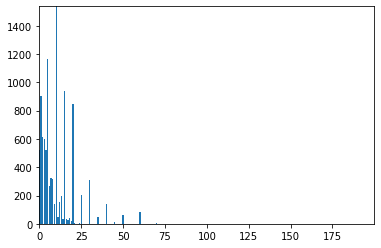

,Price,Count
0,9.99,1537
1,4.99,1168
2,14.99,942
3,0.99,906
4,19.99,849
...,...,...
57,1.20,1
58,2.79,1
59,28.99,1
60,45.00,1


In [11]:
## 1-c Price Distribution
Price_stat = pd.DataFrame(data["Final price"].astype(float).value_counts()).reset_index().rename(columns={"index":"Price","Final price":"Count"})

plt.xlim(0, Price_stat.Price.max())
plt.ylim(0, Price_stat.Count.max())
plt.bar("Price", "Count", data=Price_stat)
plt.show()

Price_stat

In [12]:
## 2 Most Recommended
Recommend_stat = data[["Appid","Game name","Recommendations", "Release date", "Final price","Genre"]].sort_values(by=["Recommendations"],ascending=False)
Recommend_stat.head(20)

,Appid,Game name,Recommendations,Release date,Final price,Genre
3456,730,Counter-Strike: Global Offensive,2850475,"Aug 21, 2012",14.99,"Action, Free to Play"
2214,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,1295198,"Dec 21, 2017",29.99,"Action, Adventure, Massively Multiplayer"
117,359550,Tom Clancy's Rainbow Six® Siege,622678,"Dec 1, 2015",19.99,Action
1060,4000,Garry's Mod,503430,"Nov 29, 2006",9.99,"Indie, Simulation"
4468,105600,Terraria,457853,"May 16, 2011",9.99,"Action, Adventure, Indie, RPG"
3234,292030,The Witcher® 3: Wild Hunt,376029,"May 18, 2015",39.99,RPG
7487,252490,Rust,367337,"Feb 8, 2018",39.99,"Action, Adventure, Indie, Massively Multiplaye..."
50,252950,Rocket League®,333485,"Jul 7, 2015",19.99,"Action, Indie, Racing, Sports"
9406,346110,ARK: Survival Evolved,284600,"Aug 27, 2017",49.99,"Action, Adventure, Indie, Massively Multiplaye..."
42,218620,PAYDAY 2,279911,"Aug 13, 2013",9.99,"Action, RPG"


In [13]:
## 3 Characteristic of the recommended (100)
Recommend = data.sort_values(by=["Recommendations"],ascending=False).head(500).drop(columns=["Category","Genre","Developer"])
Recommend

,Appid,Game name,Release date,Coming soon,Initial price,Final price,Recommendations,Genre1,Genre2,Genre3,...,Single-player,Multi-player,Co-op,MMO,VR Support,PvP,Remote Play on Phone,Developer Major,Developer 2,Developer 3
3456,730,Counter-Strike: Global Offensive,"Aug 21, 2012",False,14.99,14.99,2850475,Action,Free to Play,None,...,False,True,False,False,False,False,True,Valve,Hidden Path Entertainment,None
2214,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",False,29.99,29.99,1295198,Action,Adventure,Massively Multiplayer,...,False,True,False,False,False,True,True,PUBG Corporation,None,None
117,359550,Tom Clancy's Rainbow Six® Siege,"Dec 1, 2015",False,7.99,19.99,622678,Action,None,None,...,True,True,True,False,False,True,True,Ubisoft Montreal,None,None
1060,4000,Garry's Mod,"Nov 29, 2006",False,9.99,9.99,503430,Indie,Simulation,None,...,True,True,True,False,False,False,False,Facepunch Studios,None,None
4468,105600,Terraria,"May 16, 2011",False,9.99,9.99,457853,Action,Adventure,Indie,...,True,True,True,False,False,True,True,Re-Logic,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,428550,Momodora: Reverie Under The Moonlight,"Mar 4, 2016",False,9.99,9.99,6860,Action,Adventure,Indie,...,True,False,False,False,False,False,False,Bombservice,None,None
8751,396750,EVERSPACE™,"May 25, 2017",False,29.99,29.99,6854,Action,Indie,None,...,True,False,False,False,False,False,False,ROCKFISH Games,None,None
4013,367580,Hook,"Jul 6, 2015",False,0.99,0.99,6854,Casual,Indie,None,...,True,False,False,False,False,False,False,Maciej Targoni,Wojciech Wasiak,None
823,210770,Sanctum 2,"May 15, 2013",False,14.99,14.99,6831,Action,Indie,Strategy,...,True,True,True,False,False,False,False,Coffee Stain Studios,None,None


In [14]:
data.loc[1550]

Appid                                                              299360
Game name                                                    Block N Load
Release date                                                 Apr 30, 2015
Coming soon                                                         False
Initial price                                                         0.0
Final price                                                           0.0
Developer                            Toadman Interactive, Jagex, Artplant
Category                Single-player, Multi-player, Steam Achievement...
Genre                   Action, Free to Play, Massively Multiplayer, S...
Recommendations                                                      1974
Genre1                                                             Action
Genre2                                                       Free to Play
Genre3                                              Massively Multiplayer
Genre4                                

In [15]:
data['Single-player']=data['Single-player'].astype(int)
data['Multi-player']=data['Multi-player'].astype(int)
data['Co-op']=data['Co-op'].astype(int)
data['MMO']=data['MMO'].astype(int)
data['VR Support']=data['VR Support'].astype(int)
data['PvP']=data['PvP'].astype(int)
data['Remote Play on Phone']=data['Remote Play on Phone'].astype(int)

In [16]:
df = data['Release date'].str.split(',', expand=True)
df["Appid"]=data["Appid"]
df2 = df[0].str.split(' ', expand=True)
df[2] = df2[0]
df[3] = df2[1]
df = df.drop(0, axis=1)
df = df.dropna()
df[1] = df[1].astype('int64')
df[3] = df[3].astype('int64')
df[2] = pd.to_datetime(df[2], format='%b').dt.month
df=df.rename(columns={1:"Year",2:"Month",3:"Day"})
df["Date"] = pd.to_datetime(df[["Year","Month","Day"]])
df=df.drop(["Year","Month","Day"],axis=1).reset_index().drop("index",axis=1)
df

,Appid,Date
0,250700,2014-08-25
1,531490,2016-10-26
2,10500,2009-03-04
3,454930,2017-03-02
4,423900,2016-01-21
...,...,...
10127,940710,2020-06-16
10128,958400,2020-08-27
10129,557420,2016-12-21
10130,951430,2020-07-16


In [17]:
data.join(df,on="Appid")

ValueError: columns overlap but no suffix specified: Index(['Appid'], dtype='object')